# Importing Package

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Because the Data is using database format, so we have to import sqlite and convert it into pandas dataframe.

In [2]:
create_engine = sqlite3.connect('clubhouse/Clubhouse_Dataset_v1.db')
cur = create_engine.cursor()
cur.execute("SELECT * FROM user")
getAllData = cur.fetchall()

In [3]:
df = pd.DataFrame(getAllData)

In [4]:
df.head() #Dari data dibawah bisa dilihat bahwa kolom masih menggunakan format angka. maka harus kita ubah dulu menjadi format yang sesuai.

,0,1,2,3,4,5,6,7,8,9
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,null,4187268,599,2020-03-17T07:51:28.085566+00:00,null
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,null,3718334,1861,2020-03-17T14:36:19.468976+00:00,null
2,8,Johnny Appleseed,None,apple1,null,srt_tester_9,20,81,2020-03-19T19:47:00.323603+00:00,null
3,10,DK 🖍,https://clubhouseprod.s3.amazonaws.com:443/10_...,dk,dksf,null,49538,173,2020-03-19T23:38:52.574777+00:00,null
4,12,Jonathan Gheller,https://clubhouseprod.s3.amazonaws.com:443/12_...,jonathan,jgheller,null,21250,81,2020-03-20T02:30:22.188084+00:00,null


In [5]:
df.columns = ['userid', 'fullname', 'photo_url', 'username', 'twitter', 'instagram', 'numberfollowers', 'numberfollowing', 'created_at', 'invitebyuserid']

In [6]:
df

,userid,fullname,photo_url,username,twitter,instagram,numberfollowers,numberfollowing,created_at,invitebyuserid
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,null,4187268,599,2020-03-17T07:51:28.085566+00:00,null
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,null,3718334,1861,2020-03-17T14:36:19.468976+00:00,null
2,8,Johnny Appleseed,None,apple1,null,srt_tester_9,20,81,2020-03-19T19:47:00.323603+00:00,null
3,10,DK 🖍,https://clubhouseprod.s3.amazonaws.com:443/10_...,dk,dksf,null,49538,173,2020-03-19T23:38:52.574777+00:00,null
4,12,Jonathan Gheller,https://clubhouseprod.s3.amazonaws.com:443/12_...,jonathan,jgheller,null,21250,81,2020-03-20T02:30:22.188084+00:00,null
...,...,...,...,...,...,...,...,...,...,...
1300510,1499995,Kimberly Walton,None,kimberlywalton,null,null,3,19,2021-01-19T22:06:10.870596+00:00,2082052
1300511,1499996,Kandi Ore,https://clubhouseprod.s3.amazonaws.com:443/149...,shawtyfwe,Shawtyfwe,shawtyfwe,79,47,2021-01-01T21:06:18.711920+00:00,175468
1300512,1499997,Christina Williams,https://clubhouseprod.s3.amazonaws.com:443/149...,stinadoesmyhair,null,stinadoesmyhair,12,67,2021-01-01T21:07:31.830834+00:00,357504
1300513,1499998,Tyeshia Smith,https://clubhouseprod.s3.amazonaws.com:443/149...,tytysmith85,null,null,17,75,2021-01-05T04:07:10.033138+00:00,741419


In [7]:
df['fullname'].isna().value_counts() #untuk melihat apakah ada yg tidak mempunyai nama.

False    1300515
Name: fullname, dtype: int64

In [8]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [9]:
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['days'] = df['created_at'].dt.day

In [10]:
df.drop(columns='created_at',inplace=True)

In [11]:
df.head()

,userid,fullname,photo_url,username,twitter,instagram,numberfollowers,numberfollowing,invitebyuserid,year,month,days
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,null,4187268,599,null,2020,3,17
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,null,3718334,1861,null,2020,3,17
2,8,Johnny Appleseed,None,apple1,null,srt_tester_9,20,81,null,2020,3,19
3,10,DK 🖍,https://clubhouseprod.s3.amazonaws.com:443/10_...,dk,dksf,null,49538,173,null,2020,3,19
4,12,Jonathan Gheller,https://clubhouseprod.s3.amazonaws.com:443/12_...,jonathan,jgheller,null,21250,81,null,2020,3,20


In [12]:
df.sort_values(by='numberfollowers',ascending=False).head()

,userid,fullname,photo_url,username,twitter,instagram,numberfollowers,numberfollowing,invitebyuserid,year,month,days
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,null,4187268,599,null,2020,3,17
796,977,Marc Andreessen,https://clubhouseprod.s3.amazonaws.com:443/977...,pmarca,pmarca,null,3749921,920,null,2020,4,23
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,null,3718334,1861,null,2020,3,17
750,904,Jared Leto,https://clubhouseprod.s3.amazonaws.com:443/904...,jaredleto,null,null,3715696,106,null,2020,4,21
729,881,🆑 Chris Lyons,https://clubhouseprod.s3.amazonaws.com:443/881...,chrislyons,ChrisLyons,chrislyons,3700203,365,null,2020,4,21


In [13]:
df.sort_values(by='numberfollowing',ascending=False).head()

,userid,fullname,photo_url,username,twitter,instagram,numberfollowers,numberfollowing,invitebyuserid,year,month,days
640600,714806,Neona James,https://clubhouseprod.s3.amazonaws.com:443/714...,neechie,Neechies,neechies_boutique,1173,2504,702293,2020,12,27
1292582,1491021,Shaun Foy,https://clubhouseprod.s3.amazonaws.com:443/149...,islandboybike,weightroomfahie,officialislandboybike,1422,2500,664097,2021,1,1
406387,451847,Kory GKA,https://clubhouseprod.s3.amazonaws.com:443/451...,mrwhit,MrWhitpride,gatekeeperattire,1324,2500,333790,2020,12,15
1049551,1184998,Tanmay Kanth,https://clubhouseprod.s3.amazonaws.com:443/118...,tanmaykanth,tanmaykanth,tanmaykanth,418,2500,1130755,2020,12,31
63899,69333,Cecilia Uriona,https://clubhouseprod.s3.amazonaws.com:443/693...,ceciuriona,ceciuriona,ceciuriona,475,2500,8842,2021,1,19


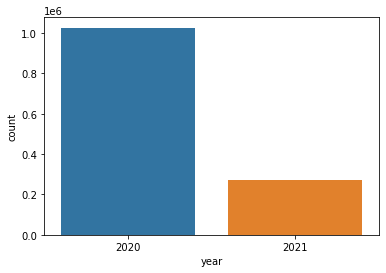

In [14]:
sns.countplot(df['year'])
plt.show()

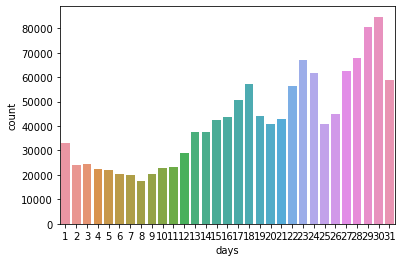

In [15]:
sns.countplot(df['days'])
plt.show()

In [22]:
df['invitebyuserid'].value_counts()

null       3214
12492       593
402821      356
3272        306
881         301
           ... 
2161283       1
561431        1
561434        1
1610016       1
1048577       1
Name: invitebyuserid, Length: 556481, dtype: int64

In [25]:
df[df['userid']==12492]

,userid,fullname,photo_url,username,twitter,instagram,numberfollowers,numberfollowing,invitebyuserid,year,month,days
11035,12492,David Castain,https://clubhouseprod.s3.amazonaws.com:443/124...,davidcastain,DavidCastain,davidcastain,2679,887,12361,2020,10,4
